### Conduct EDA and model construction using the master_reading_new.csv file that contains all relevant features and target variable

In [1]:
import sys
print(sys.base_prefix)

/opt/anaconda3


In [3]:
pip install --user scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!{sys.executable} -m pip install xgboost

In [5]:
!{sys.executable} -m pip install lightgbm

In [44]:
import pandas
pandas.__version__
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
cd

/Users/dansari


In [13]:
cd /Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/MASTER

/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/MASTER


In [15]:
master_reading_new = pandas.read_csv("master_reading.csv")
master_reading_new['NCESSCH'] = master_reading_new['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
master_reading_new.head().T

,0,1,2,3,4
SCHOOL_YEAR_x,2017-2018,2017-2018,2017-2018,2017-2018,2017-2018
ST_x,AL,AL,AL,AL,AL
NAME,Albertville High School,Asbury High School,Douglas High School,Kate D Smith DAR High School,Brindlee Mountain High School
NCESSCH,010000500871,010000600872,010000600878,010000600883,010000601585
LEVEL,High,High,High,High,High
SCH_TYPE_TEXT_x,Regular School,Regular School,Regular School,Regular School,Regular School
SCH_TYPE_x,1,1,1,1,1
TITLEI_STATUS,SWELIGSWPROG,SWELIGSWPROG,SWELIGSWPROG,SWELIGSWPROG,SWELIGSWPROG
TITLEI_STATUS_TEXT,Title I schoolwide school,Title I schoolwide school,Title I schoolwide school,Title I schoolwide school,Title I schoolwide school
MAGNET_TEXT,No,No,No,No,No


In [73]:
master_reading_new.columns

Index(['SCHOOL_YEAR_x', 'ST_x', 'NAME', 'NCESSCH', 'LEVEL', 'SCH_TYPE_TEXT_x',
       'SCH_TYPE_x', 'TITLEI_STATUS', 'TITLEI_STATUS_TEXT', 'MAGNET_TEXT',
       'TEACHERS', 'FARMS_COUNT', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APOTHENR_IND_new', 'Total_AP_other_students',
       'Total_students_tookAP', 'Income_Poverty_ratio', 'IPR_SE',
       'ALL_RLA00NUMVALID_1718', 'ALL_RLA00PCTPROF_1718_new'],
      dtype='object')

In [74]:
master_reading_new.describe()

,SCH_TYPE_x,TEACHERS,FARMS_COUNT,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,Alternate_schl_new,Total_enroll_students,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,...,Total_IB_students,SCH_APENR_IND_new,SCH_APCOURSES,SCH_APOTHENR_IND_new,Total_AP_other_students,Total_students_tookAP,Income_Poverty_ratio,IPR_SE,ALL_RLA00NUMVALID_1718,ALL_RLA00PCTPROF_1718_new
count,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,...,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000
mean,1.204286,50.066712,384.972284,0.004867,0.061989,0.052322,0.051443,836.186845,52.106122,50.710545,...,-7.025417,0.701075,5.120462,-2.031975,138.134050,122.825255,296.198607,71.260731,249.872913,50.221963
std,0.746392,41.568114,435.941109,0.069597,0.241143,0.222683,0.220908,768.211420,42.855994,42.154294,...,66.282175,0.457802,11.491547,4.554533,234.848046,215.320172,141.575491,38.503395,254.945567,23.421256
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.010000,0.000000,...,-18.000000,0.000000,-9.000000,-9.000000,-18.000000,-18.000000,48.000000,2.000000,6.000000,1.000000
25%,1.000000,18.300000,97.000000,0.000000,0.000000,0.000000,0.000000,249.000000,19.250000,18.700000,...,-18.000000,0.000000,-9.000000,-9.000000,-18.000000,-18.000000,205.000000,42.000000,74.000000,33.000000
50%,1.000000,36.300000,223.000000,0.000000,0.000000,0.000000,0.000000,548.000000,38.000000,37.000000,...,-18.000000,1.000000,5.000000,1.000000,38.000000,32.000000,264.000000,63.000000,166.000000,49.500000
75%,1.000000,74.010000,512.000000,0.000000,0.000000,0.000000,0.000000,1262.000000,76.800000,74.650000,...,-18.000000,1.000000,13.000000,1.000000,198.000000,171.000000,345.000000,92.000000,342.000000,67.000000
max,4.000000,330.360000,4329.000000,1.000000,1.000000,1.000000,1.000000,4996.000000,396.000000,382.470000,...,1335.000000,1.000000,82.000000,1.000000,3173.000000,3162.000000,979.000000,330.000000,2484.000000,99.000000


In [75]:
# Create a data frame
reading=pd.DataFrame(master_reading_new, columns=['FARMS_COUNT', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APOTHENR_IND_new', 'Total_AP_other_students',
       'Total_students_tookAP', 'Income_Poverty_ratio','ALL_RLA00PCTPROF_1718_new'])

In [76]:
#train_set, test_set= train_test_split(reading, test_size=0.2, random_state=42)

In [77]:
reading.head()

,FARMS_COUNT,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,Alternate_schl_new,Total_enroll_students,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT,FTE_teachers_count,...,Total_SAT_ACT_students,SCH_IBENR_IND_new,Total_IB_students,SCH_APENR_IND_new,SCH_APCOURSES,SCH_APOTHENR_IND_new,Total_AP_other_students,Total_students_tookAP,Income_Poverty_ratio,ALL_RLA00PCTPROF_1718_new
0,832.0,0.0,0.0,0.0,0.0,1449.0,78.17,71.17,7.0,72.88,...,363.0,0.0,-18.0,1.0,8.0,1.0,179.0,286.0,248.0,32.0
1,450.0,0.0,0.0,0.0,0.0,547.0,32.00,31.00,1.0,32.00,...,61.0,0.0,-18.0,1.0,3.0,1.0,33.0,46.0,241.0,30.0
2,429.0,0.0,0.0,0.0,0.0,591.0,36.00,36.00,0.0,36.00,...,142.0,0.0,-18.0,1.0,6.0,1.0,185.0,244.0,213.0,42.0
3,211.0,0.0,0.0,0.0,0.0,452.0,29.00,29.00,0.0,29.00,...,103.0,0.0,-18.0,1.0,6.0,1.0,116.0,205.0,254.0,57.0
4,415.0,0.0,0.0,0.0,0.0,632.0,37.00,36.00,1.0,37.00,...,76.0,0.0,-18.0,1.0,5.0,1.0,76.0,102.0,329.0,31.0


In [78]:
count = reading['FARMS_COUNT'].value_counts()
print(count)

32.0      63
40.0      61
55.0      57
60.0      55
83.0      55
          ..
1581.0     1
2262.0     1
1816.0     1
1508.0     1
1287.0     1
Name: FARMS_COUNT, Length: 1771, dtype: int64


In [98]:
reading.rename(columns={'FARMS_COUNT':'No.FARMS_students','Special_ed_schl_new':'Is_Sped_schl?','Magnet_schl_new':'Is_magnet_schl?','Charter_Schl_new':'Is_charter_schl?',
                       'Alternate_schl_new':'Is_alternate_schl?','SCH_FTETEACH_TOT':'FTE_teachcount','SCH_FTETEACH_CERT':'Certified_FTE_teachers','SCH_FTETEACH_NOTCERT':
                       'Noncertified_FTE_teachers','Total_SAT_ACT_students':'Students_participate_SAT_ACT','SCH_IBENR_IND_new':'IB_Indicator','SCH_APENR_IND_new':'AP_Indicator',
                        'SCH_APCOURSES':'No.ofAP_courses_offer','SCH_APOTHENR_IND_new':'Students_enroll_inotherAP?'}, inplace=True)

In [99]:
reading['Pct_certified_teachers']=reading['Certified_FTE_teachers']/reading['FTE_teachcount']

In [100]:
reading['Pct_noncertified_teachers']=reading['Noncertified_FTE_teachers']/reading['FTE_teachcount']

In [101]:
reading['Salary_perFTE_teacher'] = reading['SalaryforTeachers']/reading['FTE_teachers_count']

In [102]:
reading['IPR_estimate'] = reading['Income_Poverty_ratio']/100

In [103]:
reading['Percent_Reading_Proficient'] = reading['ALL_RLA00PCTPROF_1718_new']/100

In [104]:
reading_clean=reading.drop(['Certified_FTE_teachers', 'Noncertified_FTE_teachers','FTE_teachcount','FTE_teachers_count','SalaryforTeachers','Income_Poverty_ratio', 'ALL_RLA00PCTPROF_1718_new'], axis=1)

In [105]:
reading_clean.describe()

,No.FARMS_students,Is_Sped_schl?,Is_magnet_schl?,Is_charter_schl?,Is_alternate_schl?,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inotherAP,Total_AP_other_students,Total_students_tookAP,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate,Percent_Reading_Proficient
count,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000,14793.000000
mean,384.972284,0.004867,0.061989,0.052322,0.051443,836.186845,202.580883,0.052660,-7.025417,0.701075,5.120462,-2.031975,138.134050,122.825255,0.971250,0.028612,59538.582309,2.961986,0.502220
std,435.941109,0.069597,0.241143,0.222683,0.220908,768.211420,233.580685,0.229629,66.282175,0.457802,11.491547,4.554533,234.848046,215.320172,0.084878,0.084031,19432.652178,1.415755,0.234213
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,-6.000000,-18.000000,0.000000,-9.000000,-9.000000,-18.000000,-18.000000,0.000000,0.000000,1.380548,0.480000,0.010000
25%,97.000000,0.000000,0.000000,0.000000,0.000000,249.000000,40.000000,0.000000,-18.000000,0.000000,-9.000000,-9.000000,-18.000000,-18.000000,0.979167,0.000000,47531.307730,2.050000,0.330000
50%,223.000000,0.000000,0.000000,0.000000,0.000000,548.000000,113.000000,0.000000,-18.000000,1.000000,5.000000,1.000000,38.000000,32.000000,1.000000,0.000000,55897.981053,2.640000,0.495000
75%,512.000000,0.000000,0.000000,0.000000,0.000000,1262.000000,285.000000,0.000000,-18.000000,1.000000,13.000000,1.000000,198.000000,171.000000,1.000000,0.020833,67895.639698,3.450000,0.670000
max,4329.000000,1.000000,1.000000,1.000000,1.000000,4996.000000,2788.000000,1.000000,1335.000000,1.000000,82.000000,1.000000,3173.000000,3162.000000,1.250000,1.000000,477254.000000,9.790000,0.990000


In [106]:
train_set, test_set= train_test_split(reading_clean, test_size=0.2, random_state=42)

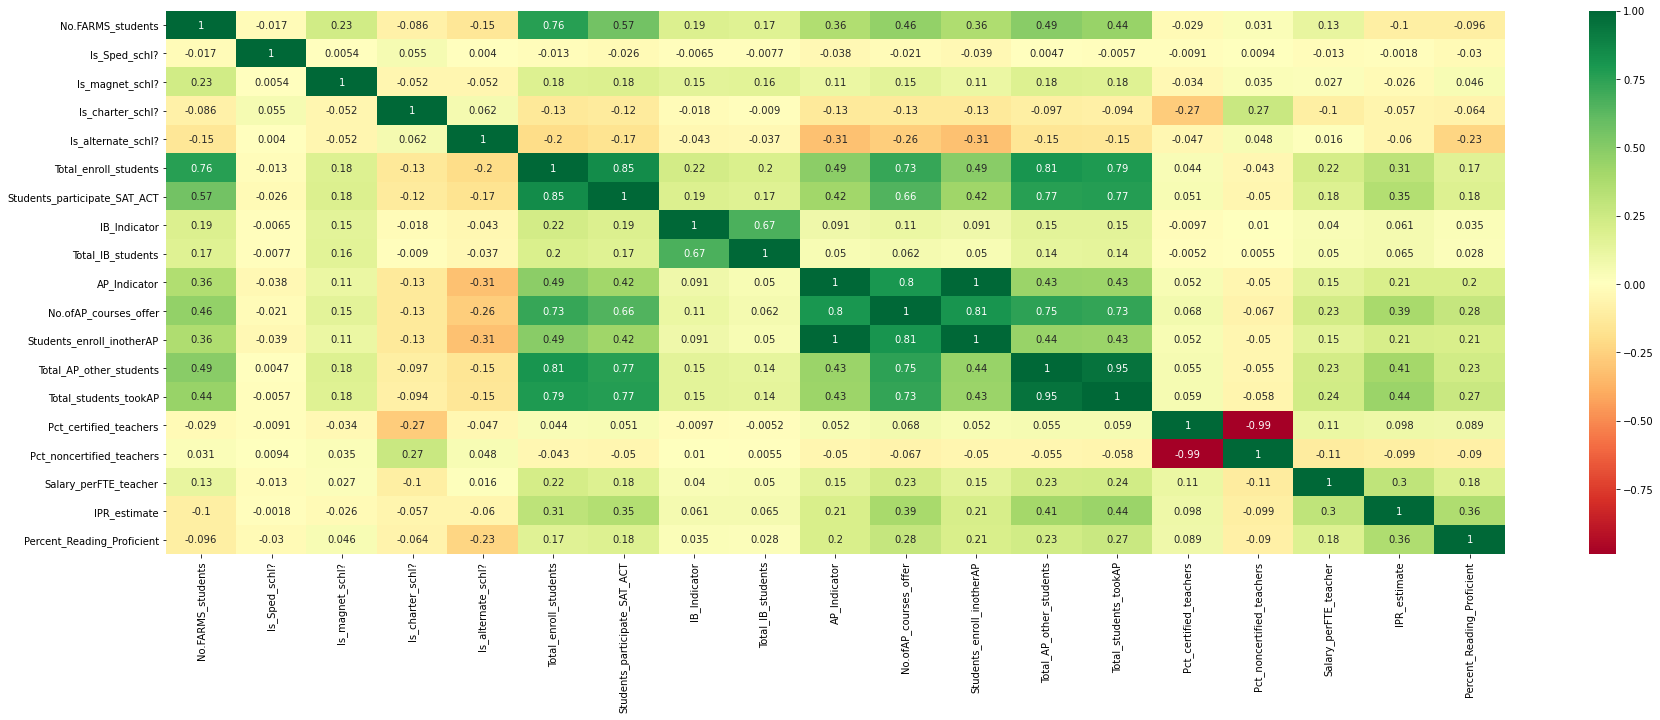

In [107]:
#get correlations of each features in dataset
corrmat = train_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,10))
#plot heat map
g=sns.heatmap(train_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [108]:
## How other variables relate with our target variable

corr_matrix = reading_clean.corr()
corr_matrix["Percent_Reading_Proficient"].sort_values(ascending=False)

Percent_Reading_Proficient      1.000000
IPR_estimate                    0.366720
No.ofAP_courses_offer           0.277211
Total_students_tookAP           0.264944
Total_AP_other_students         0.232479
Students_enroll_inotherAP       0.204461
AP_Indicator                    0.202621
Students_participate_SAT_ACT    0.185006
Salary_perFTE_teacher           0.179114
Total_enroll_students           0.169279
Pct_certified_teachers          0.090790
IB_Indicator                    0.040445
Total_IB_students               0.035825
Is_magnet_schl?                 0.034610
Is_Sped_schl?                  -0.025858
Is_charter_schl?               -0.057932
Pct_noncertified_teachers      -0.091627
No.FARMS_students              -0.097963
Is_alternate_schl?             -0.227535
Name: Percent_Reading_Proficient, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5b5b94340>,
      dtype=object)

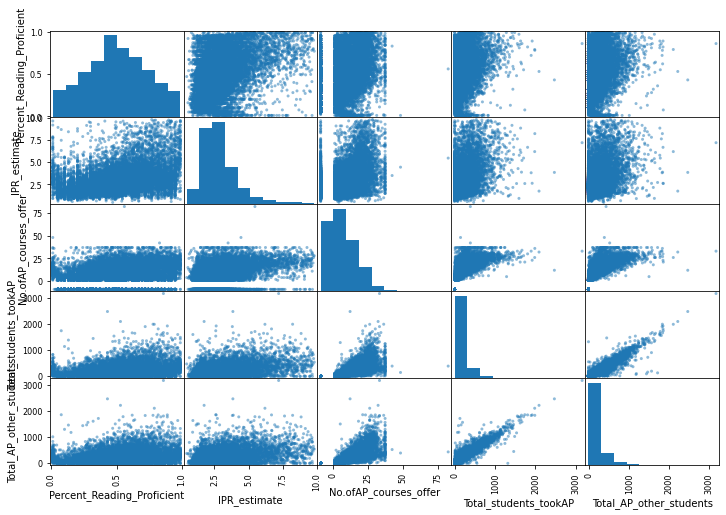

In [111]:
from pandas.plotting import scatter_matrix
attributes = ["Percent_Reading_Proficient", "IPR_estimate", "No.ofAP_courses_offer",
              "Total_students_tookAP","Total_AP_other_students"]
scatter_matrix(reading_clean[attributes], figsize=(12, 8))

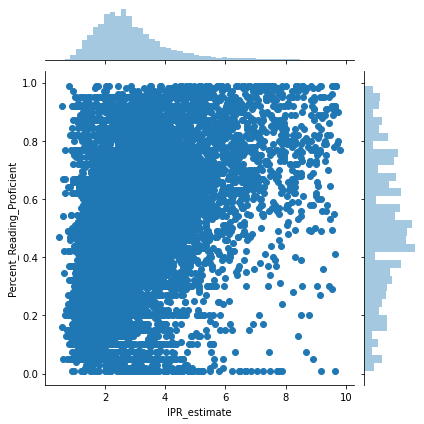

In [113]:
sns.jointplot(x="IPR_estimate", y="Percent_Reading_Proficient", data=reading_clean)

In [117]:
X = reading_clean.iloc[:, :-1]
y = reading_clean.iloc[:, -1]

In [116]:
X.head()

,No.FARMS_students,Is_Sped_schl?,Is_magnet_schl?,Is_charter_schl?,Is_alternate_schl?,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inotherAP,Total_AP_other_students,Total_students_tookAP,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate
0,832.0,0.0,0.0,0.0,0.0,1449.0,363.0,0.0,-18.0,1.0,8.0,1.0,179.0,286.0,0.910452,0.089548,51879.203348,2.48
1,450.0,0.0,0.0,0.0,0.0,547.0,61.0,0.0,-18.0,1.0,3.0,1.0,33.0,46.0,0.968750,0.031250,48494.496562,2.41
2,429.0,0.0,0.0,0.0,0.0,591.0,142.0,0.0,-18.0,1.0,6.0,1.0,185.0,244.0,1.000000,0.000000,45971.525833,2.13
3,211.0,0.0,0.0,0.0,0.0,452.0,103.0,0.0,-18.0,1.0,6.0,1.0,116.0,205.0,1.000000,0.000000,43328.431379,2.54
4,415.0,0.0,0.0,0.0,0.0,632.0,76.0,0.0,-18.0,1.0,5.0,1.0,76.0,102.0,0.972973,0.027027,41629.406757,3.29


In [38]:
# create pipeline of differennt base algorithms to be used in RFECV (no. of features will be auto-selected based on cv in RFECV)
models = {}
# linear regression
rfecv = RFECV(estimator = LinearRegression(), cv = 10, scoring = 'accuracy')
model = DecisionTreeClassifier()
models['LR'] = Pipeline(steps = [('features', rfecv), ('model', model)])
# random forest regression
rfecv = RFECV(estimator = RandomForestRegressor(), cv = 10, scoring = 'accuracy')
model = DecisionTreeClassifier()
models['RFR'] = Pipeline(steps = [('features', rfecv), ('model', model)])

# evaluate all the models
results = []
names = []
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(name)
    print('>%s: %.3f' % (name, np.mean(scores)))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [27]:
# decision tree
#rfecv = RFECV(estimator = DecisionTreeClassifier(), cv = 10, scoring = 'accuracy')
#model = DecisionTreeClassifier()
#models['DT'] = Pipeline(steps = [('features', rfecv), ('model', model)])

In [30]:
# XGBoost Classifier
#rfecv = RFECV(estimator=XGBClassifier(), cv = 10, scoring = 'accuracy')
#model = DecisionTreeClassifier()
#models['XGB'] = Pipeline(steps = [('features', rfecv), ('model', model)])

In [36]:

# evaluate all the models
results = []
names = []
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    results.append(scores)
    names.append(name)
    print('>%s: %.3f' % (name, np.mean(scores)))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [12]:
#sns.pairplot(master_reading_new)
#plt.show()

In [118]:
#Correlation with output variable
cor_target = abs(corrmat["Percent_Reading_Proficient"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

No.ofAP_courses_offer         0.279996
Total_students_tookAP         0.265550
IPR_estimate                  0.364525
Percent_Reading_Proficient    1.000000
Name: Percent_Reading_Proficient, dtype: float64

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


 mu = 0.50 and sigma = 0.23



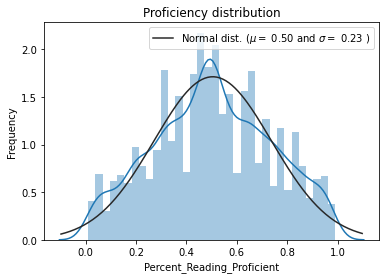

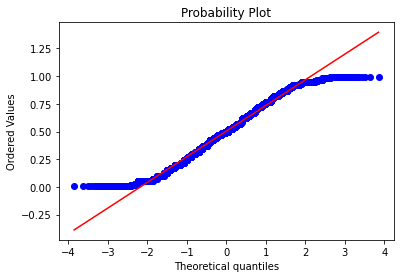

Skewness: -0.009187
Kurtosis: -0.671664


In [120]:
# Plot Histogram
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Proficiency distribution')

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

In [57]:
# Correlation Matrix Heatmap
corrmat = reading.corr()

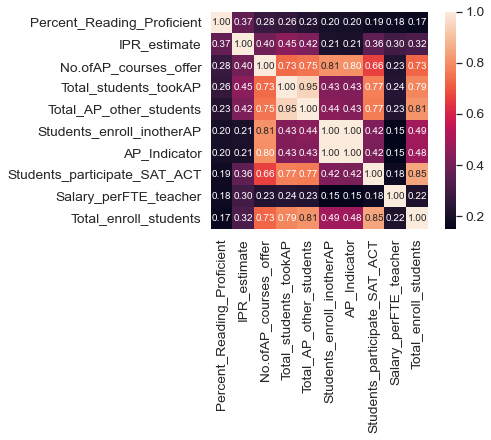

In [121]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Percent_Reading_Proficient')['Percent_Reading_Proficient'].index
cm = np.corrcoef(reading_clean[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [122]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,Percent_Reading_Proficient
1,IPR_estimate
2,No.ofAP_courses_offer
3,Total_students_tookAP
4,Total_AP_other_students
5,Students_enroll_inotherAP
6,AP_Indicator
7,Students_participate_SAT_ACT
8,Salary_perFTE_teacher
9,Total_enroll_students


In [123]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [124]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [125]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [126]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.2040 (0.0038)

ElasticNet score: 0.2040 (0.0038)



KeyboardInterrupt: 

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [130]:
regressor = LinearRegression()

In [139]:
random = RandomForestRegressor(n_estimators=10,random_state=0)

In [131]:
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

25.020679678380166 %


In [140]:
random.fit(X.reshape(-1,1),y.reshape(-1,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
coeff_df = pandas.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

In [132]:
y_pred = regressor.predict(X_test)

In [133]:
df = pandas.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
2105,0.430,0.456853
399,0.490,0.439962
8293,0.520,0.536979
1001,0.630,0.335287
12870,0.210,0.530004
...,...,...
11344,0.470,0.545603
9908,0.345,0.490448
9332,0.940,0.590272
10697,0.300,0.504695


In [134]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16370341389665635
Mean Squared Error: 0.04261249600577914
Root Mean Squared Error: 0.20642794385881758
